In [253]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [254]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [255]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rw

In [256]:
base = '/Volumes/Hublot24/Share_hublot/Data/'

savefolder = base+'Summary/Telephones/Figures/'
savefolder_local = '/Users/stephane/Documents/Articles/En_cours/BicWin2024/Summary/Telephones/Figures/'

In [272]:
dates = ['0221','0223','0226']

results = []
headers = []
for date in dates:
    csvfiles = glob.glob(base+date+'/Telephones/Bic24*/averages_Summary.csv')
    print(csvfiles)
    for csvfile in csvfiles:
        result = rw_data.read_csv(csvfile)
        header = {}
        header['date']=date
        header['name']=csvfile.split('/')[-2]
        
        headers.append(header)
        results.append(result)   

['/Volumes/Hublot24/Share_hublot/Data/0221/Telephones/Bic24_S01_2024_0221_solo/averages_Summary.csv', '/Volumes/Hublot24/Share_hublot/Data/0221/Telephones/Bic24_S01_2024_0221_withgeophones/averages_Summary.csv']
['/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/averages_Summary.csv']
['/Volumes/Hublot24/Share_hublot/Data/0226/Telephones/Bic24_S01_2024_0226_1/averages_Summary.csv']


In [273]:
datas = {}

for i,(result,head) in enumerate(zip(results,headers)):
    header = result[0]
    core = result[1:]
    #print(core)

    try:
        print(np.asarray(core).shape)
    except:
        lengths = [len(c) for c in core]
        print(lengths)
        n = np.max(lengths)
        indices = np.where(lengths<n)[0]
        
        for indice in indices[::-1]:
            print("Missing data for phone : "+str(core[indice][0]))
            print(indice)
            del core[indice]
        
        lengths = [len(c) for c in core]
        print(lengths)

    data={}
    data['d']={}
    for j,key in enumerate(header):
        data['d'][key]=np.asarray(core)[:,j]
        data['date']=head['date']
        data['name']=head['name']

    datas[i]=data

(12, 62)
(13, 62)
(10, 62)
[62, 56, 62, 62, 62, 62, 62, 62, 62, 62, 62]
Missing data for phone : 1
1
[62, 62, 62, 62, 62, 62, 62, 62, 62, 62]


In [274]:
pprint(data['d'].keys())

dict_keys(['Phone', 'ax_err', 'ax_w_mean', 'ax_high_mean', 'ax_trend_mean', 'ax_w_std', 'ax_high_std', 'ax_trend_std', 'ay_err', 'ay_w_mean', 'ay_high_mean', 'ay_trend_mean', 'ay_w_std', 'ay_high_std', 'ay_trend_std', 'az_err', 'az_w_mean', 'az_high_mean', 'az_trend_mean', 'az_w_std', 'az_high_std', 'az_trend_std', 'gx_err', 'gx_w_std', 'gx_high_std', 'gx_trend_std', 'gy_err', 'gy_w_std', 'gy_high_std', 'gy_trend_std', 'gz_err', 'gz_w_std', 'gz_high_std', 'gz_trend_std', 'mx_err', 'mx_w_mean', 'mx_high_mean', 'mx_trend_mean', 'mx_w_std', 'mx_high_std', 'mx_trend_std', 'my_err', 'my_w_mean', 'my_high_mean', 'my_trend_mean', 'my_w_std', 'my_high_std', 'my_trend_std', 'mz_err', 'mz_w_mean', 'mz_high_mean', 'mz_trend_mean', 'mz_w_std', 'mz_high_std', 'mz_trend_std', 'az_w_freq', 'elev_mean', 'elev_std', 'lat_mean', 'lat_std', 'lon_mean', 'lon_std'])


In [292]:
pprint(datas[2]['d']['az_w_freq'])

array([0.07057639, 0.06704901, 0.07124301, 0.07095251, 0.06887194,
       0.07250722, 0.06366642, 0.06932231, 0.07318105, 0.06787604])


In [260]:
datas.keys()

dict_keys([0, 1, 2, 3])

In [276]:
datas[0].keys()
data = datas[0]

for k in datas.keys():
    data = datas[k]['d']
    for key in data.keys():
        if key == 'Phone':
            data[key] = data[key].astype(int)
        else:
            data[key] = data[key].astype(float)
    datas[k]['d']=data

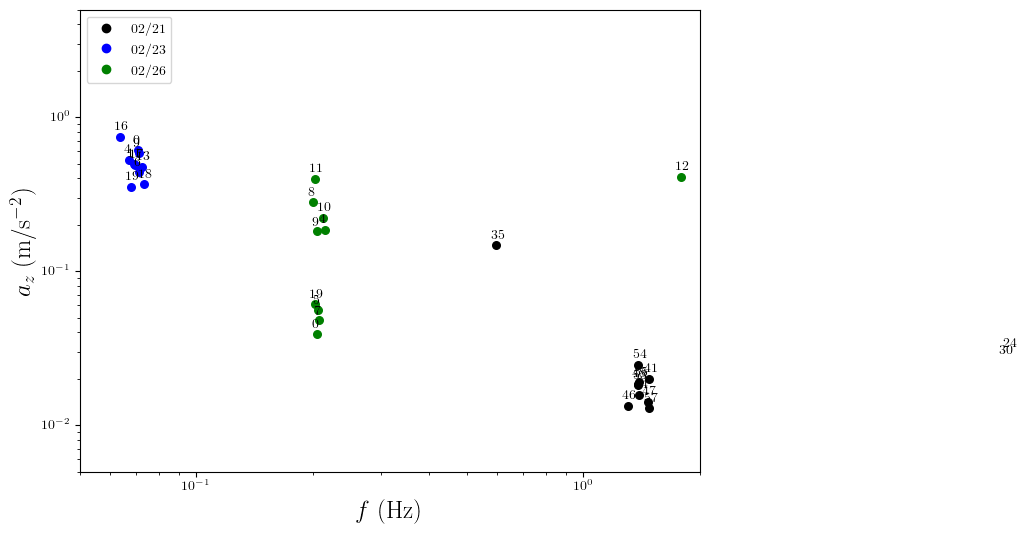

In [287]:
import matplotlib.lines as mlines


fig,ax = plt.subplots(figsize=(8,6))


varx = 'x'
vary = 'z'
xth = np.logspace(-3,0,100)

colors = ['k','r','b','g']
marker = 'o'
patches= []
for k in datas.keys():
    data = datas[k]['d']
    date = datas[k]['date']
    if date=='0221':
        name = datas[k]['name'].split('_')[-1]
        if name=='withgeophones':
            continue
    date = date[:2]+'/'+date[-2:]
    color = colors[k]
    xs = data[f'az_w_freq']
    ys = data[f'a{vary}_w_std']
    for i,(x,y) in enumerate(zip(xs,ys)):
        phone = data['Phone'][i]
        ax.scatter(x,y,marker=marker,color=color,s=30)
        ax.text(x*0.97,y*1.1,phone)

    ax.set_xlim(0.05,2)
    ax.set_ylim(0.005,5)
    
    patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
    patches.append(patch)

#    patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
#    patches.append(patch)

ax.legend(handles=patches,loc='upper left')
    #ax.plot(xth,xth*4,'r--')
ax.set_xscale('log')
ax.set_yscale('log')
figs = graphes.legende(f'$f$ (Hz)',r'$a_{'+vary+r'}$ (m/s$^{-2}$)','')
#graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_')

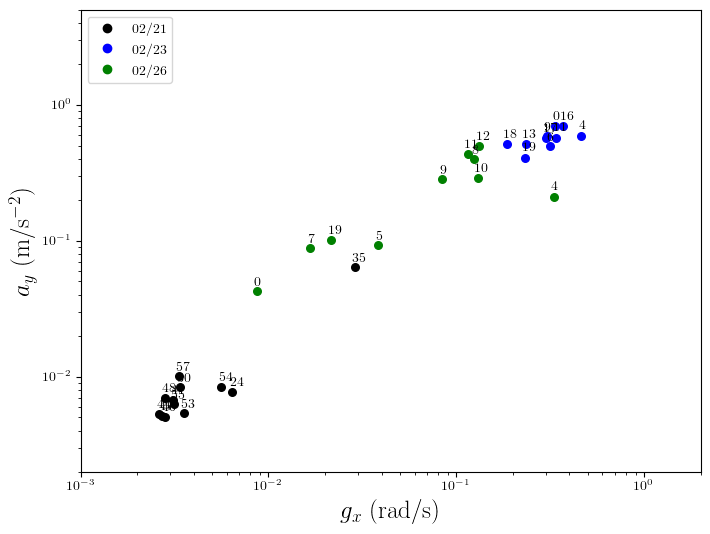

In [263]:
import matplotlib.lines as mlines


fig,ax = plt.subplots(figsize=(8,6))


varx = 'x'
vary = 'y'
xth = np.logspace(-3,0,100)

colors = ['k','r','b','g']
marker = 'o'
patches= []
for k in datas.keys():
    data = datas[k]['d']
    date = datas[k]['date']
    if date=='0221':
        name = datas[k]['name'].split('_')[-1]
        if name=='withgeophones':
            continue
    date = date[:2]+'/'+date[-2:]
    color = colors[k]
    xs = data[f'g{varx}_w_std']
    ys = data[f'a{vary}_w_std']
    for i,(x,y) in enumerate(zip(xs,ys)):
        phone = data['Phone'][i]
        ax.scatter(x,y,marker=marker,color=color,s=30)
        ax.text(x*0.97,y*1.1,phone)

    ax.set_xlim(0.001,2)
    ax.set_ylim(0.002,5)
    
    patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
    patches.append(patch)

ax.legend(handles=patches,loc='upper left')
    #ax.plot(xth,xth*4,'r--')
ax.set_xscale('log')
ax.set_yscale('log')
figs = graphes.legende(f'$g_{varx}$ (rad/s)',r'$a_{'+vary+r'}$ (m/s$^{-2}$)','')
#graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_')

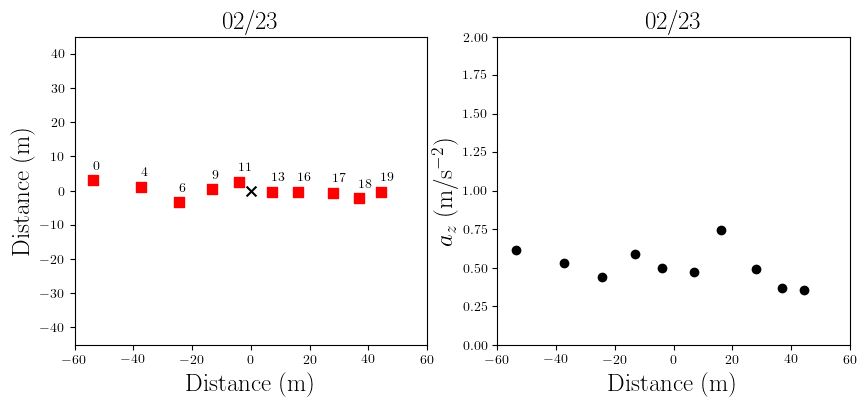

In [266]:
import matplotlib.lines as mlines
import matplotlib.patches as plt_patches

import icewave.gps.gps as gps
fig,axs = plt.subplots(figsize=(10,4),ncols=2)

k = 2

colors = ['k','r','b','g']
marker = 'o'
patches= []
data = datas[k]['d']
date = datas[k]['date']
date_raw = date

date = date[:2]+'/'+date[-2:]
color = colors[k]
xs = data[f'lon_mean']
ys = data[f'lat_mean']

radius = 6371*10**3
[xs,ys] = gps.project(xs,ys)

xs = xs*radius*np.pi*2
ys = ys*radius*np.pi*2
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)


#print(ys*radius-np.mean(ys*radius))
#stdxs = data[f'lon_std']
#stdys = data[f'lat_std']
#[stdxs,stdys] = gps.project(stdxs,stdys)

for i,(x,y,stdx,stdy) in enumerate(zip(xs,ys,stdxs,stdys)):
    phone = data['Phone'][i]
    axs[0].scatter(x,y,marker='s',color='r',s=50)
    #ellipse = plt_patches.Ellipse((x,y), stdx/10, stdy/10,color=color,fill=False)
    axs[0].text(x,y+3,phone)
    #ax.add_artist(ellipse)
    

axs[0].scatter(0,0,marker='x',color='k',s=50)
axs[0].set_xlim(-60,60)
axs[0].set_ylim(-45,45)

#patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
#patches.append(patch)

#ax.legend(handles=patches,loc='upper left')
#ax.plot(xth,xth*4,'r--')
#ax.set_xscale('log')
#ax.set_yscale('log')
figs = graphes.legende(f'Distance (m)',f'Distance (m)',date,ax=axs[0])

#second axis

ys = data['az_w_std']
axs[1].plot(xs,ys,'ko')
axs[1].set_xlim(-60,60)
axs[1].set_ylim(0,2)

figs = graphes.legende(f'Distance (m)',r'$a_z$ (m/s$^{-2})$',date,ax=axs[1])
#graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_'+date_raw+'_map_1_damping')
#graphes.save_figs(figs,savedir=savefolder_local,prefix='Bic_February_'+date_raw+'_map_1_damping')

-0.12486063502728939 32.08511711284518
1.4507332872599363 21.194708129391074
1.9303707610815763 13.208891410380602
0.8693295381963253 5.180058594793081
-0.3667992502450943 1.8613753821700811
-1.2728367000818253 -3.8115324545651674
-0.21974832750856876 -4.34381022118032
-1.3086165077984333 -4.702623529359698
-0.43888182006776333 -12.774537844583392
-0.2851772475987673 -13.721014700829983


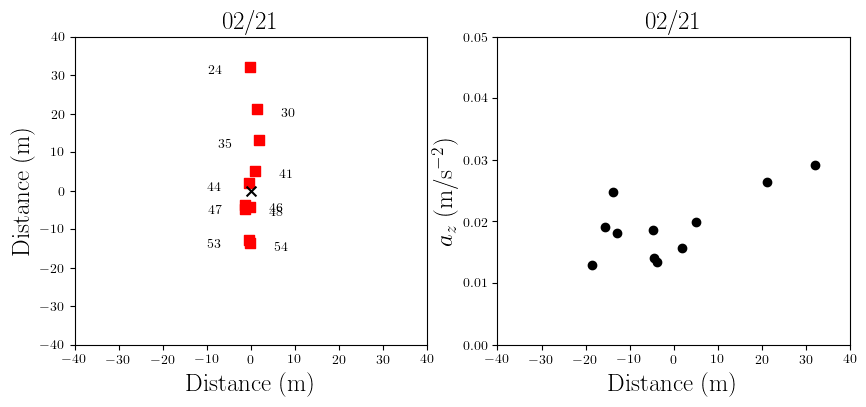

In [268]:
import matplotlib.lines as mlines
import matplotlib.patches as plt_patches

import icewave.gps.gps as gps
fig,axs = plt.subplots(figsize=(10,4),ncols=2)

k = 0

colors = ['k','r','b','g']
marker = 'o'
patches= []
data = datas[k]['d']
date = datas[k]['date']
date_raw = date

date = date[:2]+'/'+date[-2:]
color = colors[k]
xs = data[f'lon_mean']
ys = data[f'lat_mean']

radius = 6371*10**3
[xs,ys] = gps.project(xs,ys)

xs = xs*radius*np.pi*2
ys = ys*radius*np.pi*2
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)


#print(ys*radius-np.mean(ys*radius))
#stdxs = data[f'lon_std']
#stdys = data[f'lat_std']
#[stdxs,stdys] = gps.project(stdxs,stdys)

for i,(x,y,stdx,stdy) in enumerate(zip(xs,ys,stdxs,stdys)):
    phone = data['Phone'][i]
    print(x,y)
    axs[0].scatter(x,y,marker='s',color='r',s=50)
    #ellipse = plt_patches.Ellipse((x,y), stdx/10, stdy/10,color=color,fill=False)
    axs[0].text(x-2+15*(i%2-1./2),y-2,phone)
    #ax.add_artist(ellipse)
    

axs[0].scatter(0,0,marker='x',color='k',s=50)
axs[0].set_ylim(-40,40)
axs[0].set_xlim(-40,40)

#patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
#patches.append(patch)
figs = graphes.legende(f'Distance (m)',f'Distance (m)',date,ax=axs[0])


xs = data['az_w_std']
axs[1].plot(ys,xs,'ko')
axs[1].set_xlim(-40,40)
axs[1].set_ylim(0,0.05)


figs = graphes.legende(f'Distance (m)',r'$a_z$ (m/s$^{-2})$',date,ax=axs[1])

#ax.legend(handles=patches,loc='upper left')
#ax.plot(xth,xth*4,'r--')
#ax.set_xscale('log')
#ax.set_yscale('log')
#graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_'+date_raw+'_map')
#graphes.save_figs(figs,savedir=savefolder_local,prefix='Bic_February_'+date_raw+'_map')

-147.64154233969748 -17.366646338254213
-139.11361201666296 50.203746208921075
-105.02592387422919 6.919953037053347
-50.89605373702943 -4.907342197373509
-65.33172775618732 39.049010725691915
-63.85729024372995 -72.21809195913374
-16.824054639786482 -42.26780475489795
18.761812841519713 -14.537944007664919
28.75070388801396 -39.021756725385785
541.1776879001409 94.14687601290643


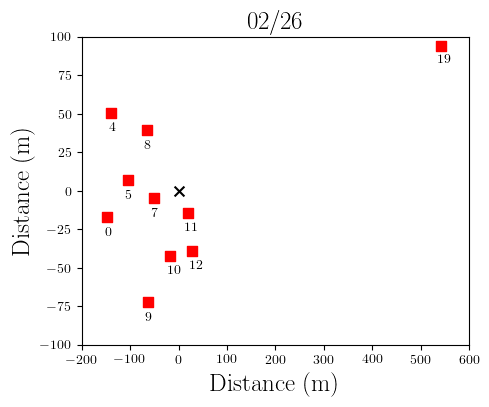

In [206]:
import matplotlib.lines as mlines
import matplotlib.patches as plt_patches

import icewave.gps.gps as gps
fig,ax = plt.subplots(figsize=(5,4))

k = 3

colors = ['k','r','b','g']
marker = 'o'
patches= []
data = datas[k]['d']
date = datas[k]['date']
date_raw = date

date = date[:2]+'/'+date[-2:]
color = colors[k]
xs = data[f'lon_mean']
ys = data[f'lat_mean']

radius = 6371*10**3
[xs,ys] = gps.project(xs,ys)

xs = xs*radius*np.pi*2
ys = ys*radius*np.pi*2
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)


#print(ys*radius-np.mean(ys*radius))
#stdxs = data[f'lon_std']
#stdys = data[f'lat_std']
#[stdxs,stdys] = gps.project(stdxs,stdys)

for i,(x,y,stdx,stdy) in enumerate(zip(xs,ys,stdxs,stdys)):
    phone = data['Phone'][i]
    print(x,y)
    ax.scatter(x,y,marker='s',color='r',s=50)
    #ellipse = plt_patches.Ellipse((x,y), stdx/10, stdy/10,color=color,fill=False)
    ax.text(x-5,y-12,phone)
    #ax.add_artist(ellipse)
    

ax.scatter(0,0,marker='x',color='k',s=50)
ax.set_xlim(-200,600)
ax.set_ylim(-100,100)

#patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
#patches.append(patch)

#ax.legend(handles=patches,loc='upper left')
#ax.plot(xth,xth*4,'r--')
#ax.set_xscale('log')
#ax.set_yscale('log')
figs = graphes.legende(f'Distance (m)',f'Distance (m)',date)
graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_'+date_raw+'_map')